# 보스톤 주택 가격 예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

## 1. 데이터 탐색

 ```
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 ```

* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

- DataFrame으로 준비

In [97]:
boston_data = load_boston()

C:\Users\Playdata\anaconda3_NR\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

In [102]:
df = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
df['PRICE'] = boston_data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
boston_df = pd.DataFrame(boston_data['data'], columns = boston_data['feature_names'])

In [12]:
type(boston_data['data']), boston_data['data'].shape

(numpy.ndarray, (506, 13))

In [19]:
boston_df['target'] = boston_data['target']

In [20]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- 누락 데이터 확인

In [22]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [23]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

- 통계 정보

In [24]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- 시각화

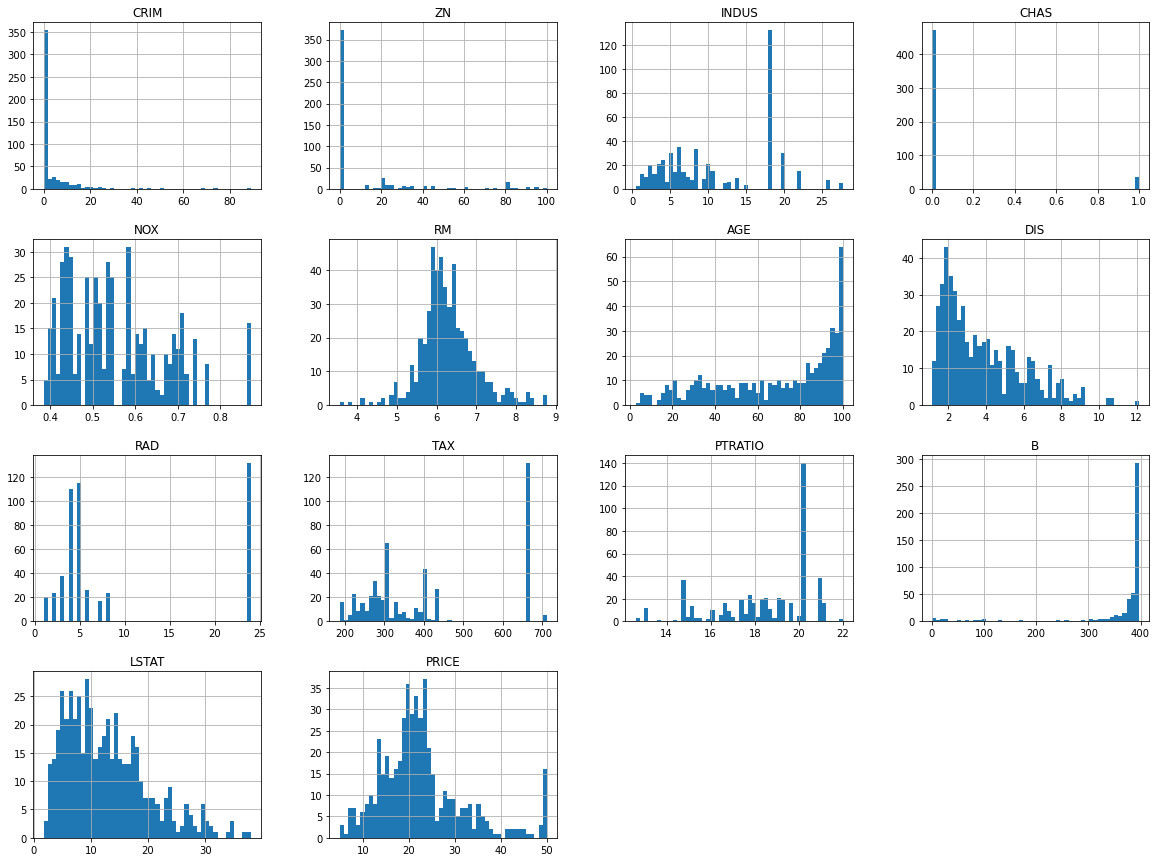

In [103]:
h = df.hist(bins=50, figsize=(20, 15))

- 상관계수

In [27]:
boston_corr = boston_df.corr()
boston_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

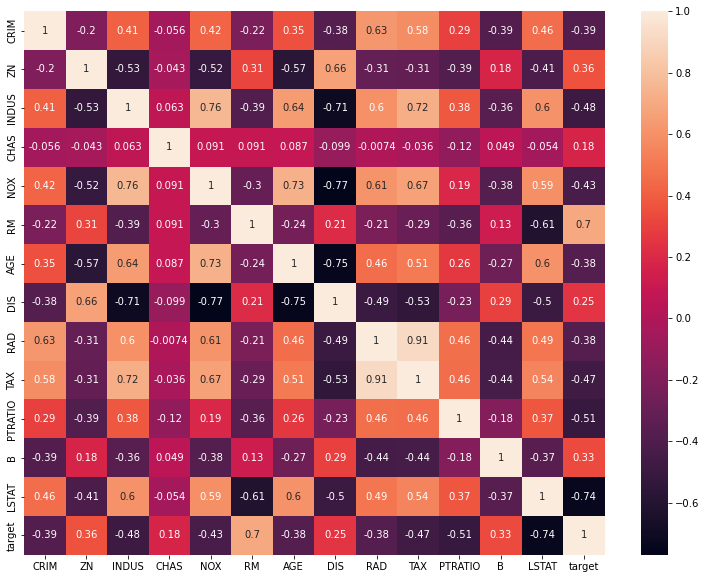

In [30]:
import seaborn as sns

f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(boston_corr, annot = True)

<AxesSubplot:xlabel='LSTAT', ylabel='PRICE'>

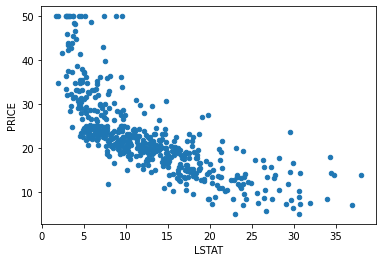

In [104]:
df.plot(kind = 'scatter', x = 'LSTAT', y = 'PRICE')

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

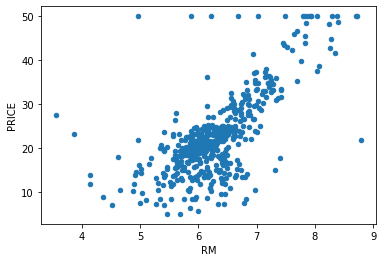

In [105]:
df.plot(kind = 'scatter', x = 'RM', y = 'PRICE')

## 2. 데이터 준비

In [31]:
from sklearn.model_selection import train_test_split

In [106]:
X = df.drop('PRICE', axis = 1)
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [67]:
# 전체 데이터를 무작위로 섞은 후에 훈련 데이터와 테스트 데이터를 나눠서 반환
X_train, X_test, y_train, y_test = train_test_split(boston_data['data'], boston_data['target'], test_size = 0.2, random_state = 42)  # numpy 데이터를 넣어주는 것이 좋음

In [107]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


## 3. 모델 훈련

### 3.1 기본 선형 모델

- 기본 선형모델(정규방정식)

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 교차검증을 사용하지 않은 방법 (잘못된 방법)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared = False)  # MSE의 제곱근을 구하려면 squared = False
rmse

4.928602182665355

In [123]:
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()

# 교차검증을 사용한 경우 (올바른 방법)
scores = cross_val_score(lin_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
lin_reg_rmse = np.sqrt((-scores).mean())
lin_reg_rmse

4.86358080742005

- 기본 선형모델(경사하강법 + 특성스케일링)

In [74]:
np.random.seed(42)

In [127]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler  # 평균을 0, 분산을 1로 변환

In [129]:
# 교차검증 사용

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)

sgd_reg = SGDRegressor(penalty = None, random_state = 42)
scores = cross_val_score(sgd_reg, X_train_scaled, y_train, scoring = 'neg_mean_squared_error', cv = 5)
sgd_reg_rmse = np.sqrt((-scores).mean())
sgd_reg_rmse

4.898581570477037

In [130]:
X_train_scaled.mean(), X_train_scaled.std()

(-9.740875280793452e-17, 1.0)

### 3.2 다항 회귀 모델

In [131]:
from sklearn.preprocessing import PolynomialFeatures     # 변환기

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly_features.fit_transform(X_train)

X_train.shape, X_train_poly.shape

((404, 13), (404, 104))

In [132]:
# 다항회귀 (정규방정식)
lin_reg = LinearRegression()

# 교차검증
scores = cross_val_score(lin_reg, X_train_poly, y_train, scoring = 'neg_mean_squared_error', cv = 5)
poly_lin_reg_rmse = np.sqrt((-scores).mean())
poly_lin_reg_rmse

4.349154691332248

In [133]:
# 다항회귀 (경사하강법)
# (1) Poly(제곱특성 추가) -> (2) STD scale(표준화) -> (3) SGDRegressor (경사하강법)

# (1) Poly(제곱특성 추가)

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly_features.fit_transform(X_train)


# (2) STD scale(표준화)

std_scaler = StandardScaler()
X_train_poly_scaled = std_scaler.fit_transform(X_train_poly)


# (3) SGDRegressor (경사하강법)

sgd_reg = SGDRegressor(penalty = None, random_state = 42)
scores = cross_val_score(sgd_reg, X_train_poly_scaled, y_train, scoring = 'neg_mean_squared_error', cv = 5)
sgd_reg_rmse = np.sqrt((-scores).mean())
sgd_reg_rmse

3.8507394341607575

### pipeline으로 이어버림 (모델까지도 이을 수 있음)

In [134]:
from sklearn.pipeline import Pipeline

In [135]:
# 다항회귀 (경사하강법) with Pipeline
# (1) Poly(제곱특성 추가) -> (2) STD scale(표준화) -> (3) SGDRegressor (경사하강법)

# (1) Poly(제곱특성 추가) -> (2) STD scale(표준화)

poly_std_pipelin = Pipeline([
                    ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
                    ('std_scaler', StandardScaler())
                    ])

X_train_poly_scaled = poly_std_pipelin.fit_transform(X_train)


# (3) SGDRegressor (경사하강법)

sgd_reg = SGDRegressor(penalty = None, random_state = 42)
scores = cross_val_score(sgd_reg, X_train_poly_scaled, y_train, scoring = 'neg_mean_squared_error', cv = 5)
sgd_reg_rmse = np.sqrt((-scores).mean())
sgd_reg_rmse

3.8507394341607575

### 3.3 규제모델

- **모델 파라미터** 규제가 되는지 확인(교차검증 사용하지 않음)

In [136]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [138]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [139]:
X_train.shape

(404, 13)

In [140]:
lin_reg.intercept_, lin_reg.coef_

(30.24675099392408,
 array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
        -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
         2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
        -5.08571424e-01]))

<AxesSubplot:>

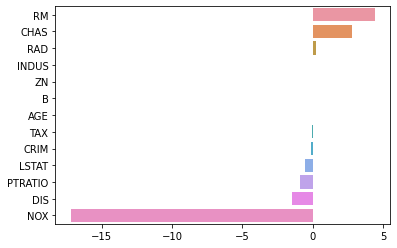

In [145]:
lin_coef = pd.Series(lin_reg.coef_, index = X_train.columns)
lin_coef_sort = lin_coef.sort_values(ascending = False)
sns.barplot(x = lin_coef_sort.values, y = lin_coef_sort.index)

- 릿지 회귀(Ridge)

In [151]:
alphas = [0, 0.1, 1, 10, 100]
coef_df = pd.DataFrame()
for alpha in alphas:
    ridge_reg = Ridge(alpha = alpha, random_state = 42)
    ridge_reg.fit(X_train, y_train)

    ridge_coef = pd.Series(ridge_reg.coef_, index = X_train.columns)
    ridge_coef_sort = ridge_coef.sort_values(ascending = False)
    
    column = 'alpha: ' + str(alpha)
    coef_df[column] = ridge_coef_sort

coef_df

,alpha: 0,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100
RM,4.438835,4.445779,4.464505,4.195326,2.438815
CHAS,2.784438,2.750333,2.545470,1.813291,0.550702
RAD,0.262430,0.260043,0.248882,0.248031,0.299014
INDUS,0.040381,0.034896,0.007498,-0.026277,-0.048625
ZN,0.030110,0.030459,0.032271,0.035552,0.039892
B,0.012351,0.012400,0.012642,0.012833,0.011951
AGE,-0.006296,-0.007305,-0.012191,-0.015341,0.000545
TAX,-0.010647,-0.010780,-0.011475,-0.012744,-0.014630
CRIM,-0.113056,-0.112400,-0.109234,-0.107134,-0.110765
LSTAT,-0.508571,-0.510902,-0.523833,-0.561835,-0.689539


In [94]:
# 릿지회귀 모델 (L2 규제) - 경사하강법으로 해를 구함

# 규제 없이
sgd_reg = SGDRegressor(penalty = None, random_state = 42)
sgd_reg.fit(X_train, y_train)  
print(sgd_reg.intercept_, sgd_reg.coef_)

# 규제 추가
sgd_reg_l2 = SGDRegressor(penalty = 'l2', alpha = 0.1, random_state = 42)
sgd_reg_l2.fit(X_train, y_train)
print(sgd_reg_l2.intercept_, sgd_reg_l2.coef_)

[-3.03697309e+09] [ 1.96158882e+11 -4.37426320e+10  2.46260854e+11  3.90764013e+10
  1.33614271e+10  9.42690473e+10  1.37150171e+11 -8.36352963e+10
  1.32613262e+11  2.61743760e+11 -1.74038703e+11  1.90495835e+11
  4.35886010e+11]
[2.30881072e+10] [-5.42774540e+11 -2.40598302e+11 -1.92927130e+11 -1.70039845e+10
  4.77798504e+09  4.18449263e+10 -1.55267196e+11  1.50425226e+11
 -3.62810997e+11 -7.81007337e+10  1.72580814e+11 -4.81196425e+11
  1.67977759e+11]


- 라쏘 회귀(Lasso)

In [153]:
alphas = [0.05, 0.1, 0.2, 0.5, 1]
coef_df = pd.DataFrame()
for alpha in alphas:
    Lasso_reg = Lasso(alpha = alpha, random_state = 42)
    Lasso_reg.fit(X_train, y_train)

    Lasso_coef = pd.Series(Lasso_reg.coef_, index = X_train.columns)
    Lasso_coef_sort = Lasso_coef.sort_values(ascending = False)
    
    column = 'alpha: ' + str(alpha)
    coef_df[column] = Lasso_coef_sort

coef_df

,alpha: 0.05,alpha: 0.1,alpha: 0.2,alpha: 0.5,alpha: 1
RM,4.443676,4.311687,4.026917,3.129886,1.630489
CHAS,1.704029,0.919952,0.000000,0.000000,0.000000
RAD,0.234443,0.239237,0.245289,0.236596,0.219654
ZN,0.034602,0.034893,0.034848,0.032640,0.028501
B,0.013035,0.013091,0.013039,0.012350,0.011181
TAX,-0.012599,-0.012962,-0.013317,-0.013032,-0.012286
AGE,-0.017338,-0.015126,-0.010294,0.000000,0.016395
INDUS,-0.023023,-0.016785,-0.005376,-0.000000,-0.000000
CRIM,-0.104256,-0.104157,-0.103020,-0.093034,-0.076609
NOX,-0.524613,-0.000000,-0.000000,-0.000000,-0.000000


- 엘라스틱텟(ElasticNet)

In [95]:
# ElasticNet (L1 규제, L2 규제)
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(alpha = 0.1, l1_ratio = 0.5, random_state = 42)
elastic_reg.fit(X_train, y_train)
elastic_reg.intercept_, elastic_reg.coef_

(24.453646004331702,
 array([-0.10685304,  0.0370152 , -0.03089955,  0.97722083, -0.01993179,
         3.76434053, -0.01170315, -1.17602006,  0.25844329, -0.0134792 ,
        -0.76162739,  0.0127458 , -0.60005149]))

In [96]:
# 규제 없이
sgd_reg = SGDRegressor(penalty = None, random_state = 42)
sgd_reg.fit(X_train, y_train)    # y.ravel(), y.flatten()은 데이터를 일차원으로 만들어줌
print(sgd_reg.intercept_, sgd_reg.coef_)

# 규제 추가
sgd_reg_l1l2 = SGDRegressor(penalty = 'elasticnet', alpha = 0.1, random_state = 42)
sgd_reg_l1l2.fit(X_train, y_train)
print(sgd_reg_l1l2.intercept_, sgd_reg_l1l2.coef_)

[-3.03697309e+09] [ 1.96158882e+11 -4.37426320e+10  2.46260854e+11  3.90764013e+10
  1.33614271e+10  9.42690473e+10  1.37150171e+11 -8.36352963e+10
  1.32613262e+11  2.61743760e+11 -1.74038703e+11  1.90495835e+11
  4.35886010e+11]
[3.81886933e+10] [ 1.71763195e+11 -2.01955893e+11 -2.65900737e+10  7.77143325e+08
  9.26623089e+09  1.14534431e+11 -1.04361834e+11  1.06121350e+11
 -3.43992195e+10  1.20757337e+10  1.97798740e+11 -3.62252830e+11
  5.94183847e+10]


In [155]:
alphas = [0.05, 0.1, 0.2, 0.5, 1]
coef_df = pd.DataFrame()
for alpha in alphas:
    ElasticNet_reg = ElasticNet(alpha = alpha, random_state = 42)
    ElasticNet_reg.fit(X_train, y_train)

    ElasticNet_coef = pd.Series(ElasticNet_reg.coef_, index = X_train.columns)
    ElasticNet_coef_sort = ElasticNet_coef.sort_values(ascending = False)
    
    column = 'alpha: ' + str(alpha)
    coef_df[column] =ElasticNet_coef_sort

coef_df

,alpha: 0.05,alpha: 0.1,alpha: 0.2,alpha: 0.5,alpha: 1
RM,4.134773,3.764341,3.160552,2.051658,1.162996
CHAS,1.521003,0.977221,0.404020,0.000000,0.000000
RAD,0.247966,0.258443,0.273963,0.287364,0.275980
ZN,0.035809,0.037015,0.038071,0.037961,0.035571
B,0.012867,0.012746,0.012439,0.011721,0.011013
TAX,-0.012941,-0.013479,-0.014028,-0.014505,-0.014273
AGE,-0.014885,-0.011703,-0.005211,0.006508,0.018591
INDUS,-0.027025,-0.030900,-0.031594,-0.030560,-0.020130
CRIM,-0.106450,-0.106853,-0.107092,-0.103047,-0.093299
LSTAT,-0.569848,-0.600051,-0.644219,-0.719262,-0.775576
